In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms

epochs = 100

In [11]:
transform = transforms.Compose([transforms.Resize(500),
transforms.CenterCrop(500),
transforms.ToTensor()])
dataset = datasets.ImageFolder("./chest_xray./test/", transform=transform)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)
dataset_val = datasets.ImageFolder("./chest_xray./val/", transform=transform)
val_loader = torch.utils.data.DataLoader(dataset_val, batch_size=10, shuffle=True)
#dataset = torch.utils.data.ConcatDataset([dataset, dataset_rotation, dataset_jitter, dataset_affine])

In [3]:
training_set, validation_set = torch.utils.data.random_split(dataset, [269,67], generator=torch.Generator().manual_seed(42))

train_loader = torch.utils.data.DataLoader(training_set, batch_size=10, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=10, shuffle=True)
images, labels = next(iter(train_loader))



#plt.imshow(dataset[0][0][2], cmap='gray')

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(3,1) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(dataset[300][0][0])
axarr[1].imshow(dataset[300][0][1])
axarr[2].imshow(dataset[300][0][2])

ValueError: Sum of input lengths does not equal the length of the input dataset!

<Figure size 432x288 with 0 Axes>

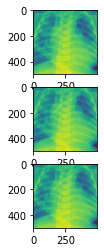

In [4]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(3,1) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(dataset[300][0][0])
axarr[1].imshow(dataset[300][0][1])
axarr[2].imshow(dataset[300][0][2])

In [18]:
import torch.nn as nn
#import torch
class Model(nn.Module):
    def __init__(self, num_classes = 2):
        print("priviet")
        super(Model, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=4)

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=4)

        self.conv3 = nn.Conv2d(in_channels=20, out_channels=30, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=4)

        self.fc1 = nn.Linear(in_features=1470, out_features=num_classes)

    def forward(self, inp):
        output = self.conv1(inp)
        output = self.relu(output)
 
        output = self.pool(output)

        output = self.conv2(output)
        output = self.relu2(output)

        output = self.pool2(output)

        output = self.conv3(output)
        output = self.relu3(output)
        
        output = self.pool3(output)
        

        output = output.view(len(inp), 1470)

        output = self.fc1(output)



        return output

In [19]:
model = Model(num_classes = 2)
#model = model.cuda()
#nn_model.init(num_classes = 2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001)

priviet


In [ ]:


loss_data = []
validation_loss = []

#training of network
for epoch in range(epochs):
    print('\rEpoch: [{}/{}]'.format(epoch+1, epochs),end='')
    epoch_loss =0
    for batch_nr, (images, labels) in enumerate(train_loader):

        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        predict = model.forward(images)
        # calculate-the-batch-loss
        loss = criterion(predict, labels)
        epoch_loss +=loss
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
         #perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
         #update-training-loss
    loss_data.append(epoch_loss)





Epoch: [8/100]

In [30]:
#Validation
correct = 0
total = 0
confusion = np.array([[0,0],[0,0]])
for batch_nr, (images, labels) in enumerate(val_loader):
    print('\rEpoch: [{}/{}]'.format(batch_nr, len(val_loader)),end='')
    predict = model.forward(images)
    for i in range(len(images)):

        preede = torch.argmax(predict[i])
        is_correct = preede == labels[i]
        if(preede == labels[i]):
            correct +=1
        total += 1
        if(labels[i] == 0):
            if(is_correct):
                confusion[0][0] += 1
            else:
                confusion[1][0] += 1
        if(labels[i] == 1):
            if(is_correct):
                confusion[1][1] += 1
            else:
                confusion[0][1] += 1

print("Correct : ", correct)
print("Total : ", total)
print("Accuracy : " , correct/total*100 , "%")

#plt.imshow(images[0][0])
print(confusion)

plt.plot(range(1,epochs+1), loss_data,label='training')
#plt.plot(range(1,epochs+1),total_validation_loss, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch: [0/0.2]

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same

In [6]:
model_gpu = Model(num_classes = 2)
model_gpu = model_gpu.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_gpu.parameters(),lr = 0.0001)
for n, p in model_gpu.named_parameters():
    print(p.device, ' ', n)

priviet
cuda:0   conv1.weight
cuda:0   conv1.bias
cuda:0   conv2.weight
cuda:0   conv2.bias
cuda:0   conv3.weight
cuda:0   conv3.bias
cuda:0   fc1.weight
cuda:0   fc1.bias


In [7]:
loss_data = []


#training of network
for epoch in range(epochs):
    print('\rEpoch: [{}/{}]'.format(epoch+1, epochs),end='')
    epoch_loss =0
    for batch_nr, (images, labels) in enumerate(train_loader):
        images = images.to('cuda')
        labels = labels.to('cuda')
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        predict = model_gpu.forward(images)
        # calculate-the-batch-loss
        loss = criterion(predict, labels)
        epoch_loss +=loss
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
         #perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
         #update-training-loss
    loss_data.append(epoch_loss)

Epoch: [100/100]

In [12]:
#Validation
validation_loss = []
batch = []
correct = 0
total = 0
confusion = np.array([[0,0],[0,0]])
for batch_nr, (images, labels) in enumerate(val_loader):
    print('\rBatch: [{}/{}]'.format(batch_nr+1, len(val_loader)),end='')
    images = images.to('cuda')
    labels = labels.to('cuda')
    predict = model_gpu.forward(images)
    loss = criterion(predict, labels)
    validation_loss.append(loss)
    batch.append(batch_nr)
    for i in range(len(images)):

        preede = torch.argmax(predict[i])
        is_correct = preede == labels[i]
        if(preede == labels[i]):
            correct +=1
        total += 1
        if(labels[i] == 0):
            if(is_correct):
                confusion[0][0] += 1
            else:
                confusion[1][0] += 1
        if(labels[i] == 1):
            if(is_correct):
                confusion[1][1] += 1
            else:
                confusion[0][1] += 1

print("\nCorrect : ", correct)
print("Total : ", total)
print("Accuracy : " , correct/total*100 , "%")

#plt.imshow(images[0][0])
print(confusion)


Batch: [2/2]
Correct :  12
Total :  16
Accuracy :  75.0 %
[[6 2]
 [2 6]]


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

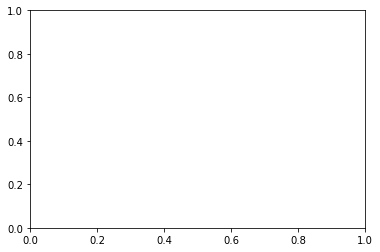

In [13]:
plt.plot(range(1,epochs+1), loss_data,label='training')
plt.plot(batch,validation_loss, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()